In [1]:
pip install jsmetrics

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install netcdf4

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [8]:
import xarray as xr
import numpy as np
import cftime
import jsmetrics
import jsmetrics.metrics.jet_statistics as jet_statistics
import matplotlib.pyplot as plt
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from collections import Counter
import pandas as pd

In [9]:
# Función para mapear contourf con contour
def contour(data,contourdata,levels=np.arange(0,11),ccmap='PuBu',extend='max',limite_NS=42,clevels=np.arange(230,300,15),titulo='OLR y pr',cbarlabel='pr  [mm day$^{-1}$]'):
    lons,lats=data.lon,data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    contourdata, lon = add_cyclic_point(contourdata, coord=lons)
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree(),alpha=0.9)
    cc=ax.contour(lon,lats,contourdata,levels=clevels,colors='k',transform=ccrs.PlateCarree())
    ax.clabel(cc, cc.levels, inline=True, fontsize=10)
    ax.set_extent([-180,180, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = True
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo,fontsize=13)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

In [10]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel(xlab,fontsize=10)
    plt.ylabel(ylab,fontsize=10)
    plt.title(title,fontsize=11)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=8)

### **<font color="Purple"> Datos de HadGEM3 </font>**

##### **<font color="olive"> Temperatura </font>**

In [11]:
tas_file = 'tasday79.nc'

In [12]:
#archivo historical
tas_ds=xr.open_dataset(tas_file)
tas=tas_ds['tas']

In [13]:
# Promedio de temperatura por estación 
tas_estacion=tas.groupby(tas.time.dt.season).mean(dim='time') #tas ya está a partir de 1979
tas_djf = tas_estacion[0]

In [14]:
tas_inviernos = tas.sel(time=tas['time.month'].isin([12, 1, 2]))

In [15]:
latsHG=tas.lat
lonsHG=tas.lon

##### **<font color="olive"> Viento </font>**

In [16]:
u_99= 'uaday200hpa_99_mx.nc'
u_14='uaday200hpa_14_mx.nc'

In [17]:
# Abrir archivos y seleccionar variables a usar 
u_ds99=xr.open_dataset(u_99)
ua99=u_ds99['ua']  
u_ds14=xr.open_dataset(u_14)
ua14=u_ds14['ua']

In [18]:
uHG = xr.concat([ua99, ua14], dim='time')

In [19]:
latsuHG = ua99.lat
lonsuHG = ua99.lon

In [20]:
u_seasonHG=uHG.groupby(uHG.time.dt.season).mean(dim='time') 
u_DJFHG = u_seasonHG[0]

In [21]:
u_inviernosHG = uHG.sel(time=uHG ['time.month'].isin([12, 1, 2]))

### **<font color="Purple"> Datos de ERA-5 </font>**

##### **<font color="olive"> Temperatura </font>**

In [22]:
filet2m_era5 = 't2m_daily.nc'

In [23]:
t2m_ds=xr.open_dataset(filet2m_era5)
t2m=t2m_ds['t2m']

In [24]:
t2m=t2m-273.15

In [25]:
# Calcular promedio estacional
t2m_estacion=t2m.groupby(t2m.time.dt.season).mean(dim='time') 

In [26]:
t2m_anual = t2m.groupby(t2m.time.dt.year).mean(dim='time').mean(dim='year')

In [27]:
#seleccionar inviernos
invs_E5 = t2m_estacion[0]

In [28]:
latsE5_t=t2m.latitude
lonsE5_t=t2m.longitude

In [29]:
t2m_inviernos = t2m.sel(time=t2m['time.month'].isin([12, 1, 2]))

##### **<font color="olive"> Viento </font>**

In [30]:
fileu_era5 = 'u_daily_500.nc'

In [31]:
u_ds = xr.open_dataset(fileu_era5)
u_era5 = u_ds['u']

In [32]:
lonsuE5 = u_era5.longitude
latsuE5 = u_era5.latitude

In [33]:
#Seleccionar solo 200 hPa 
u200E5 = u_era5.sel(level=200)

In [34]:
u200E5_anual=u200E5.mean(dim='time') 

In [35]:
u200E5_season = u200E5.groupby(u200E5.time.dt.season).mean(dim='time')
uE5_DJF = u200E5_season[0]

In [36]:
u_inviernosE5 = u200E5.sel(time=u200E5['time.month'].isin([12, 1, 2]))

### **<font color="olive"> CAOs de HadGEM </font>**

In [37]:
def CAOS_MXHG(Tdias):
    mean = Tdias.mean()
    desv_est = Tdias.std()
    condicionCAO = mean - 2 * desv_est  
    dias_CAO = []
    temp_list = []

    for i in range(len(Tdias) - 1):
        if Tdias[i] < condicionCAO and Tdias[i + 1] < condicionCAO:
            dias_CAO.append(i)
            dias_CAO.append(i + 1)
            dias_CAOS = pd.DataFrame(dias_CAO).drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
    
    # Obtener las fechas correspondientes usando los índices
    dias_CAO_dates = Tdias['time'].values[dias_CAO]

    # Convertir las fechas a un calendario gregoriano estándar 
    fechas_CAO_datetime = pd.to_datetime([str(date) for date in dias_CAO_dates],errors='coerce')    
    fechas_indices = {fecha: dias_CAO[i] for i, fecha in enumerate(fechas_CAO_datetime)}
    
    # Imprimir las fechas y sus índices
    for fecha, indice in fechas_indices.items():
        temperatura = Tdias[indice].values 
        temp_list.append(temperatura)
     #   print(f"Índice: {indice}, Fecha: {fecha}, Temperatura: {temperatura}")
    
    #print(pd.DataFrame(dias_CAO).drop_duplicates().size)
    #print(len(fechas_CAO_datetime),len(dias_CAO),len(dias_CAO_dates))
    promedioT=np.mean(temp_list)
    
    dicc={'fechas':fechas_indices,'temperaturas':temp_list,'freq':len(dias_CAOS)/36,'promedioT':promedioT}
    
    return dicc

In [38]:
#Elegir un cuadro de 4x4
latitudes = tas_inviernos.sel(lat=slice(22,27))
longitudes = latitudes.sel(lon=slice(255,262))

In [39]:
weights = np.cos(np.deg2rad(longitudes))
weights.name = "weights"

In [40]:
tas_weighted = longitudes.weighted(weights)

In [41]:
norte = tas_weighted.mean(['lon','lat']) 

In [42]:
CAOsHG = CAOS_MXHG(norte) #esto llamó a mi función con el que ya está pesado
fechas_caoHG = CAOsHG['fechas']

In [43]:
indicesHG=[fechas_caoHG[key] for key in CAOsHG['fechas'].keys()]

In [44]:
tempsHG = tas_inviernos.isel(time=indicesHG)

In [45]:
tempsCAOHG=tempsHG.mean('time')

### **<font color="olive"> CAOs de ERA-5</font>**

In [46]:
def E5_CAOS_MX(Tdias):
    """
    Esta función identifica los días cuando se cumple la condición de CAO (Cold Air Outbreak)
    y devuelve las fechas correspondientes en un calendario estándar.
    
    Parámetros:
    - Tdias (xarray.DataArray): Temperatura diaria en invierno durante ~30 años.
    
    Retorna:
    - lista de fechas
    - medidas de frecuencia de caos.
    - temperatura
    """
    mean = Tdias.mean()
    desv_est = Tdias.std()
    condicionCAO = mean - 2 * desv_est  
    dias_CAO = []
    temp_list = []
    print(condicionCAO)
    #return
    for i in range(len(Tdias) - 1):
        if Tdias[i] < condicionCAO and Tdias[i + 1] < condicionCAO:
            dias_CAO.append(i)
            dias_CAO.append(i + 1)
            dias_CAOS = pd.DataFrame(dias_CAO).drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
    
    # Obtener las fechas correspondientes usando los índices
    dias_CAO_dates = Tdias['time'].values[dias_CAO]

    # Convertir las fechas a un calendario gregoriano estándar 
    fechas_CAO_datetime = pd.to_datetime([str(date) for date in dias_CAO_dates],errors='coerce')    
    fechas_indices = {fecha: dias_CAO[i] for i, fecha in enumerate(fechas_CAO_datetime)}
    
    # Imprimir las fechas y sus índices
    for fecha, indice in fechas_indices.items():
        temperatura = Tdias[indice].values 
        temp_list.append(temperatura)

    promedioT=np.mean(temp_list)

    return {'fechas':fechas_indices,'temperaturas':temp_list,'freq':len(dias_CAOS)/36,'promedioT':promedioT}

In [47]:
#datos solo de inviernos (de los 40 años)
t2m_inviernos = t2m.sel(time=t2m['time.month'].isin([12, 1, 2]))

In [48]:
#Elegir un cuadro de 4x4 (el mismo de las simulaciones)
mx_slicedE5 = t2m_inviernos.sel(latitude=slice(27,22)) 
mx_slicedE5 = mx_slicedE5.sel(longitude=slice(255,262)) 

In [49]:
mx_slicedE5 = mx_slicedE5.rename({'latitude': 'lat', 'longitude': 'lon'})

In [50]:
mx_slicedE5=mx_slicedE5.rename('ua') 

In [51]:
mx_slicedE5

<xarray.DataArray 'ua' (time: 3669, lat: 11, lon: 15)> Size: 5MB
array([[[10.72883018, 11.05836085, 11.67640872, ...,  9.54596826,
          9.41941241,  9.76752469],
        [ 9.0773266 , 11.25455589, 11.85803979, ..., 12.04946388,
         11.63338643, 11.83636125],
        [ 8.05927186, 11.25622991, 12.63101813, ..., 12.81499284,
         12.86027505, 13.09062009],
        ...,
        [14.00505304, 10.71970678, 10.82475148, ..., 18.98618069,
         18.67598495, 19.81398316],
        [16.69235597, 13.36390371, 12.67705366, ..., 18.93152397,
         21.38421311, 21.52508182],
        [20.15765929, 16.53692329, 13.11037351, ..., 19.46101622,
         21.53596295, 21.87244079]],

       [[ 4.75994754,  4.24225712,  4.25054351, ...,  1.25672768,
          0.95649235,  1.00077016],
        [ 3.6549275 ,  4.54969073,  4.85854727, ...,  2.71647237,
          2.04686472,  1.78630364],
        [ 2.69897887,  3.86191997,  4.85394371, ...,  3.16284958,
          2.79490017,  2.53040515],
...
        [18.24291742, 16.04768106, 17.53968223, ..., 24.72848894,
         23.89971662, 24.33353791],
        [21.10892947, 18.81980399, 19.28600364, ..., 24.87593625,
         25.45963931, 23.539903  ],
        [23.63866104, 21.32105234, 17.62569992, ..., 25.31365268,
         25.62055731, 24.9643884 ]],

       [[20.05496932, 21.03849234, 22.436929  , ..., 23.2674866 ,
         23.06891557, 23.03897168],
        [18.69864888, 21.51856843, 22.91221731, ..., 24.06915524,
         23.96869307, 23.68848638],
        [17.9553262 , 20.30011974, 22.33671027, ..., 24.70795831,
         24.399593  , 24.0123511 ],
        ...,
        [17.70546916, 16.43735742, 18.34930345, ..., 24.91285894,
         24.16036645, 24.67768982],
        [19.63964995, 18.39101392, 19.27805106, ..., 25.4406505 ,
         25.89508358, 23.85297493],
        [21.75333181, 20.18951398, 17.59957002, ..., 25.63313537,
         25.61731136, 25.09187311]]])
Coordinates:
  * time     (time) datetime64[ns] 29kB 1979-01-01T11:30:00 ... 2019-02-28T11...
  * lon      (lon) float32 60B 255.0 255.5 256.0 256.5 ... 261.0 261.5 262.0
  * lat      (lat) float32 44B 27.0 26.5 26.0 25.5 25.0 ... 23.5 23.0 22.5 22.0

In [52]:
weights = np.cos(np.deg2rad(mx_slicedE5))
weights.name = "weights"

In [53]:
t2m_weighted = mx_slicedE5.weighted(weights)

In [54]:
norteE5 = t2m_weighted.mean(['lon','lat']) #promedio a variable ya pesada
norteE5 

<xarray.DataArray 'ua' (time: 3669)> Size: 29kB
array([12.70385005,  5.15118216,  4.68601582, ..., 18.57529558,
       19.898325  , 20.90318976])
Coordinates:
  * time     (time) datetime64[ns] 29kB 1979-01-01T11:30:00 ... 2019-02-28T11...

In [55]:
CAOsE5 = E5_CAOS_MX(norteE5) #esto llamó a mi función con el que ya está pesado
fechas_caoE5 = CAOsE5['fechas']

<xarray.DataArray 'ua' ()> Size: 8B
array(8.03601693)


In [56]:
E5_listindex=[fechas_caoE5[key] for key in CAOsE5['fechas'].keys()]

In [57]:
tempsE5 = t2m_inviernos.isel(time=E5_listindex)

In [58]:
tempsCAOE5=tempsE5.mean('time')  #es el promedio del total de CAOS

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Estadística </i> </h1>
#####   - `Anual` y `en una región`



In [59]:
# este es para HadGEM
def recortes1a1 (ua1,latA,latB,lonA,lonB,año):
    """
    Esta función nos recortará los datos (años,latitudes, longitudes) para usarlos en otras funciones 
    ua1,va1: viento (zonal,meridional) de la simulación 1 
    ua2,va2:  viento (zonal,meridional) de la simulación 2
    latA,latB: recorte de latitudes de menor (A) a mayor (B)
    lonA,lonB: recorte de longitudes de menor (A) a mayor (B)
    """
    ua1["plev"]=ua1["plev"]/100

    ua1['units']='hPa'
    
    ua1 = ua1.sel(lat=slice(latA, latB), lon=slice(360-lonB, 360-lonA)).where(ua1.time.dt.year > año, drop=True)

    #Recorte para la temporada invernal en el HN
    
    ua1=ua1.where((ua1.time.dt.month==12)| (ua1.time.dt.month==1)| (ua1.time.dt.month==2),drop=True)
   
    return {'ua1': ua1}

In [60]:
#este es para HadGEM
def js_pos_intens (ua1):
    """
    Esta función encuentra la posición promedio y la intensidad, usando el método de Woollings et al. 2010
    ua1: Viento zonal de la simulación 1 (ua1)
    ua2: Viento zonal de la simulación 2 (ua2)
    nivel: a qué nivel de presión se hará el cálculo, en Pa
    
    """

    #nivel = ua1.plev
    #Convertir el tiempo a gregoriano 
    ua1 = ua1.convert_calendar(calendar='gregorian', align_on='year')
    
    #Usamos jsmetrics statistics
    sim1 = jsmetrics.jet_statistics.woollings_et_al_2010(ua1,filter_freq=4,window_size=20)
    
    #POSICIÓN
    sim1_p=sim1["jet_lat"].groupby(sim1["jet_lat"].time.dt.year).mean() 
    
    #VELOCIDAD
    sim1_v=sim1["jet_speed"].groupby(sim1["jet_speed"].time.dt.year).mean()  
    
    return {'Posición del jet en simulación 1':sim1_p,
            'Velocidad del jet en simulación 1':sim1_v
            }

In [61]:
#recortes1a1 tiene argumentos(ua1,latA,latB,lonA,lonB,año1)
recorteR = recortes1a1(uHG,10,40,67,129,1978)

In [62]:
#js_pos_intens tiene argumentos (ua1)
POS_VEL = js_pos_intens(recorteR['ua1'])
POS_VEL

{'Posición del jet en simulación 1': <xarray.DataArray 'jet_lat' (year: 36)> Size: 288B
 array([33.671875  , 30.70833333, 33.30555556, 32.33333333, 33.02777778,
        32.73611111, 30.68055556, 31.13888889, 33.40277778, 32.5       ,
        33.45833333, 32.51388889, 31.38888889, 29.61111111, 30.55555556,
        33.59722222, 31.80555556, 29.59722222, 31.98611111, 31.68055556,
        31.84722222, 32.65277778, 33.56944444, 31.27777778, 33.11111111,
        29.5       , 34.31944444, 31.72222222, 30.83333333, 35.59722222,
        32.91666667, 31.875     , 28.5       , 33.75      , 34.77777778,
        31.515625  ])
 Coordinates:
     plev     float64 8B 250.0
     units    <U3 12B 'hPa'
   * year     (year) int64 288B 1979 1980 1981 1982 1983 ... 2011 2012 2013 2014,
 'Velocidad del jet en simulación 1': <xarray.DataArray 'jet_speed' (year: 36)> Size: 288B
 array([43.00248152, 45.5051937 , 48.0577625 , 47.21879916, 41.99009748,
        49.00541644, 43.0318697 , 44.95540083, 43.79065333, 

In [63]:
#datos solo de invierno (de los 36 años)
tas_inviernos = tas.sel(time=tas['time.month'].isin([12, 1, 2]))

In [64]:
def HG_CAOS_MX(Tdias):
    """
    Esta función identifica los días cuando se cumple la condición de CAO (Cold Air Outbreak) y devuelve las fechas correspondientes en un calendario estándar.
    
    Parámetros:
    - Tdias (xarray.DataArray): Temperatura diaria en invierno durante ~30 años.
    
    Retorna:
    - lista de fechas
    - medidas de frecuencia de caos.
    - temperatura
    """
    mean = Tdias.mean()
    desv_est = Tdias.std()
    condicionCAO = mean - 2 * desv_est  
    dias_CAO = []
    temp_list = []

    for i in range(len(Tdias) - 1):
        if Tdias[i] < condicionCAO and Tdias[i + 1] < condicionCAO:
            dias_CAO.append(i)
            dias_CAO.append(i + 1)
            dias_CAOS = pd.DataFrame(dias_CAO).drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
    
    # Obtener las fechas correspondientes usando los índices
    dias_CAO_dates = Tdias['time'].values[dias_CAO]

    # Convertir las fechas a un calendario gregoriano estándar 
    fechas_CAO_datetime = pd.to_datetime([str(date) for date in dias_CAO_dates],errors='coerce')    
    fechas_indices = {fecha: dias_CAO[i] for i, fecha in enumerate(fechas_CAO_datetime)}
    
    # Imprimir las fechas y sus índices
    for fecha, indice in fechas_indices.items():
        temperatura = Tdias[indice].values 
        temp_list.append(temperatura)
   
    promedioT=np.mean(temp_list)
    
    return {'fechas':fechas_indices,'temperaturas':temp_list,'freq':len(dias_CAOS)/36,'promedioT':promedioT}

In [65]:
latsHG = tas_inviernos.sel(lat=slice(22,27))
lonsHG = latitudes.sel(lon=slice(255,262))

In [66]:
weights = np.cos(np.deg2rad(lonsHG))
weights.name = "weights"

In [67]:
tas_weighted = lonsHG.weighted(weights)

In [68]:
norte = tas_weighted.mean(['lon','lat']) #promedio a variable ya pesada
norte #ya lo puedo meter en función de CAO, no'? sí ya

<xarray.DataArray 'tas' (time: 3240)> Size: 13kB
array([11.943233,  9.749307, 11.778044, ..., 11.680151, 11.034022,
       12.069647], dtype=float32)
Coordinates:
  * time     (time) object 26kB 1979-01-01 12:00:00 ... 2014-12-30 12:00:00
    height   float64 8B 1.5

In [69]:
def CAO_añosHG(resHG_fxCAO,año1,año2):
    resHG_fxCAO = HG_CAOS_MX(norte)     
    fechas_CAO = list(resHG_fxCAO['fechas'].keys())  # Extraer las fechas de los eventos CAO 
    fechas_df = pd.to_datetime(fechas_CAO)    # Convertir las fechas en un formato adecuado  
    años = fechas_df.year  # Extraer los años de las fechas  
    conteo_años = Counter(años)  # Contar cuántas veces se repite cada año
    rango_años = range(año1, año2) # Crear un rango de años de 1979 a 2014    
    conteo_completo = {año: conteo_años.get(año, 0) for año in rango_años} # Asegurarnos de que todos los años del rango tengan un valor, aunque sea 0  
    años_unicos = list(conteo_completo.keys()) # Preparar los datos para graficar
    CAOsxaño = list(conteo_completo.values())
    return {'años':años_unicos,'CAOs por año':CAOsxaño}

In [70]:
CAOsxaño = CAO_añosHG(HG_CAOS_MX(norte),1979,2015)

In [71]:
def varianza1a1(sim1_p, sim1_v):
    # Calcular varianza y media para la posición y velocidad
    var_1p = sim1_p.var().round(2)
    mean_1p = sim1_p.round(2)
    var_1v = sim1_v.var().round(2)
    mean_1v = sim1_v.round(2)
    
    return {'var_POS':var_1p, 'mean_POS':mean_1p, 'var_VEL': var_1v, 'mean_VEL':mean_1v }

In [72]:
POSyVEL = varianza1a1(POS_VEL['Posición del jet en simulación 1'],
               POS_VEL['Velocidad del jet en simulación 1'],)

In [73]:
# Datos para graficar varianza y medias de HadGEM
mean_POS = POSyVEL['mean_POS']
mean_VEL = POSyVEL['mean_VEL']
var_POS = POSyVEL['var_POS'], 
var_VEL = POSyVEL['var_VEL']

In [74]:
# Datos para graficar CAOs por año
años =  CAOsxaño['años']
cantidad_eventos = CAOsxaño['CAOs por año']

In [1]:
def E5js_pos_intens(ua1): 
    """
    Esta función encuentra la posición promedio y la intensidad, usando el método de Woollings et al. 2010.
    
    Parameters:
    ua1: Viento zonal de la simulación 1 (DataArray o Dataset).
    nivel: a qué nivel de presión se hará el cálculo, en Pa.
    
    Returns:
    dict: Un diccionario con la posición y velocidad del jet en la simulación.
    """
    
    # Convertir el tiempo a gregoriano
    ua1 = ua1.convert_calendar(calendar='gregorian', align_on='year')
    
    # Usar jsmetrics para obtener estadísticas del jet
    sim1 = jsmetrics.jet_statistics.woollings_et_al_2010(ua1, filter_freq=4, window_size=20)
    
    # Calcular la posición promedio del jet
    sim1_p = sim1["jet_lat"].groupby(sim1["jet_lat"].time.dt.year).mean()
    
    # Calcular la velocidad promedio del jet
    sim1_v = sim1["jet_speed"].groupby(sim1["jet_speed"].time.dt.year).mean()
    
    # Retornar resultados en un diccionario
    return {
        'Posición del jet en simulación 1': sim1_p,
         'Velocidad del jet en simulación 1': sim1_v
            }


In [76]:
E5POS_VEL = E5js_pos_intens(mx_slicedE5)
E5POS_VEL

{'Posición del jet en simulación 1': <xarray.DataArray 'jet_lat' (year: 41)> Size: 328B
 array([23.36875   , 24.14285714, 23.60555556, 23.27222222, 23.25      ,
        23.92307692, 23.03333333, 23.75      , 23.73888889, 23.51648352,
        23.50555556, 24.46111111, 23.17222222, 23.08241758, 24.04444444,
        23.22777778, 23.77777778, 23.91208791, 23.33888889, 24.23333333,
        24.66111111, 24.26373626, 23.45      , 24.18888889, 23.65555556,
        23.84065934, 23.71666667, 24.28333333, 23.81666667, 24.52197802,
        23.96111111, 24.12222222, 23.73333333, 24.51098901, 23.88888889,
        24.08888889, 23.61666667, 24.16483516, 24.62777778, 23.91666667,
        23.41836735])
 Coordinates:
   * year     (year) int64 328B 1979 1980 1981 1982 1983 ... 2016 2017 2018 2019,
 'Velocidad del jet en simulación 1': <xarray.DataArray 'jet_speed' (year: 41)> Size: 328B
 array([15.68757351, 15.71265772, 15.13246728, 16.13014155, 14.83397663,
        15.85044722, 15.04266833, 16.05629095,

In [77]:
def CAO_añosE5(resE5_fxCAO,año1,año2):
    resE5_fxCAO = E5_CAOS_MX(norteE5)     
    fechas_CAOE5 = list(resE5_fxCAO['fechas'].keys())  # Extraer las fechas de los eventos CAO 
    fechas_dfE5 = pd.to_datetime(fechas_CAOE5)    # Convertir las fechas en un formato adecuado  
    añosE5 = fechas_dfE5.year  # Extraer los años de las fechas  
    conteo_añosE5 = Counter(añosE5)  # Contar cuántas veces se repite cada año
    rango_añosE5 = range(año1, año2) # Crear un rango de años de 1979 a 2019    
    conteo_completoE5 = {año: conteo_añosE5.get(año, 0) for año in rango_añosE5} # Asegurarnos de que todos los años del rango tengan un valor, aunque sea 0  
    años_unicosE5 = list(conteo_completoE5.keys()) 
    CAOsxañoE5 = list(conteo_completoE5.values())
    return {'añosE5':años_unicosE5,'CAOs por año_E5':CAOsxañoE5}

In [78]:
def E5varianza (sim1_p,sim1_v): #sim2_p, sim2_v
            #Varianza de posición
    #simulación 1
    var_POS=sim1_p.var().round(2)
    mean_POS=sim1_p.round(2)

            #Varianza de velocidad
    #simulación 1
    var_VEL=sim1_v.var().round(2)
    mean_VEL=sim1_v.round(2)
   
    return  {'E5mean_POS': mean_POS, 'E5var_POS': var_POS,'E5mean_VEL':mean_VEL,'E5var_VEL':var_VEL}

In [79]:
E5POSyVEL = E5varianza(E5POS_VEL['Posición del jet en simulación 1'],
               E5POS_VEL['Velocidad del jet en simulación 1'])

In [80]:
E5mean_VEL = E5POSyVEL['E5mean_VEL']
E5var_VEL = E5POSyVEL['E5var_VEL']
E5mean_POS = E5POSyVEL['E5mean_POS']
E5var_POS = E5POSyVEL['E5var_POS']

In [81]:
CAOsxañoE5 = CAO_añosE5(E5_CAOS_MX(norteE5),1979,2020)

<xarray.DataArray 'ua' ()> Size: 8B
array(8.03601693)
<xarray.DataArray 'ua' ()> Size: 8B
array(8.03601693)


In [82]:
# Datos para graficar CAOs por año
añosE5 =  CAOsxañoE5['añosE5']
cantidad_eventosE5 = CAOsxañoE5['CAOs por año_E5']

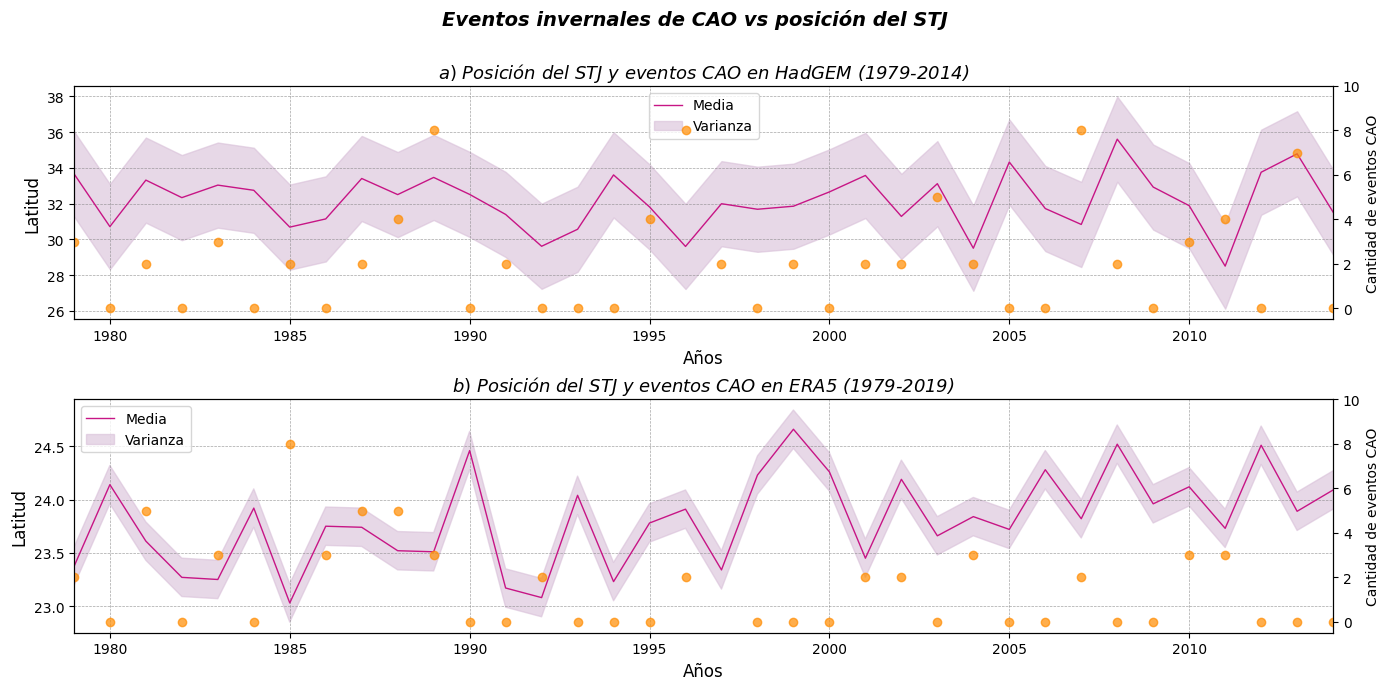

In [87]:
fig, axs = plt.subplots(2, 1, figsize=(14, 7))  # Crear subgráficos 2x1
plt.subplots_adjust(hspace=0.6)  # Ajustar el espacio entre los subgráficos

# Primer subplot - HadGEM
ax1 = axs[0]
ax1.plot(años, mean_POS, color='mediumvioletred', linewidth=1, label="Media")
ax1.fill_between(años, mean_POS + var_POS, mean_POS - var_POS, color='thistle', alpha=0.6, label="Varianza")
ax1.set_xlim([1979, 2014])
ax1.set_xlabel("Años", fontsize=12)
ax1.set_ylabel('Latitud', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_title('a$)$ Posición del STJ y eventos CAO en HadGEM (1979-2014)', fontsize=13, color="k", fontstyle='italic')
ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax1.legend()

# Eventos CAO en el primer subplot
ax1_twin = ax1.twinx()
ax1_twin.scatter(años, cantidad_eventos, color='darkorange', alpha=0.7, label="Eventos CAO")
ax1_twin.set_ylim([-0.5, 10])
ax1_twin.set_ylabel("Cantidad de eventos CAO", color='k')
ax1_twin.tick_params(axis='y', labelcolor='k')

# Segundo subplot - ERA5
ax2 = axs[1]
ax2.plot(añosE5, E5mean_POS, color='mediumvioletred', linewidth=1, label="Media")
ax2.fill_between(añosE5, E5mean_POS + E5var_POS, E5mean_POS - E5var_POS, color='thistle', alpha=0.6, label="Varianza")
ax2.set_xlim([1979, 2014])
ax2.set_xlabel("Años", fontsize=12)
ax2.set_ylabel('Latitud', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.set_title('b$)$ Posición del STJ y eventos CAO en ERA5 (1979-2019)', fontsize=13, color="k", fontstyle='italic')
ax2.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax2.legend()

# Eventos CAO en el segundo subplot
ax2_twin = ax2.twinx()
ax2_twin.scatter(añosE5, cantidad_eventosE5, color='darkorange', alpha=0.7, label="Eventos CAO")
ax2_twin.set_ylim([-0.5, 10])
ax2_twin.set_ylabel("Cantidad de eventos CAO", color='k')
ax2_twin.tick_params(axis='y', labelcolor='k')

plt.tight_layout()
plt.subplots_adjust(top=0.87) 
plt.suptitle('Eventos invernales de CAO vs posición del STJ',fontsize=14,color="k",fontstyle='italic',fontweight='bold');
#plt.show()

plt.savefig('CAOsvsposicion')